# **SuperKart Sales Prediction**

## Introduction / Problem Statement

### Context:

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. It is extremely important for a company to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action. Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. 
An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

### Objective:

SuperKart is an organization that owns a chain of supermarkets and food marts providing a wide range of products. They want to predict the future sales revenue of its different outlets so that they can strategize their sales operation across different tier cities and plan their inventory accordingly. To achieve this purpose, SuperKart has hired a data science firm, shared the sales records of its various outlets for the previous quarter, and asked the firm to come up with a suitable model to predict the total sales of the stores for the upcoming quarter.

### Data Description:

The data contains the different attributes of the various products and stores. The detailed data dictionary is given below.

* Product_Id - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
* Product_Weight - the weight of each product
* Product_Sugar_Content - sugar content of each product like low sugar, regular, and no sugar
* Product_Allocated_Area - the ratio of the allocated display area of each product to the total display area of all the products in a store
* Product_Type - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
* Product_MRP - maximum retail price of each product
* Store_Id - unique identifier of each store
* Store_Establishment_Year - the year in which the store was established
* Store_Size - the size of the store depending on sq. feet like high, medium, and low
* Store_Location_City_Type - the type of city in which the store is located like Tier 1, Tier 2, and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
* Store_Type - the type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2, and Food Mart
* Product_Store_Sales_Total - total revenue generated by the sale of that particular product in that particular store

### Importing the necessary libraries and overview of the dataset

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split the data
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# Import system 
import sys

### Import util.py helper file

In [2]:
# Append the directory to your python path using sys
sys.path.append('../utilities')

# Import the utils.py file
import utils

### Importing the Dataset

In [3]:
kart = pd.read_csv("../datasets/SuperKart.csv")

In [4]:
# Copying data to another variable to avoid any changes to original data
data = kart.copy()

### View the first and last 5 rows of the dataset

In [5]:
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


**Observation:**

* The sales of the store are indicated by the variable Product_Store_Sales_Total is the target variable and the rest of the variables are independent variables based on which we will predict the total sales of the stores for the upcoming quarter.

In [6]:
data.tail()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
8758,NC7546,14.80,No Sugar,0.016,Health and Hygiene,140.53,OUT004,2009,Medium,Tier 2,Supermarket Type2,3806.53
8759,NC584,14.06,No Sugar,0.142,Household,144.51,OUT004,2009,Medium,Tier 2,Supermarket Type2,5020.74
8760,NC2471,13.48,No Sugar,0.017,Health and Hygiene,88.58,OUT001,1987,High,Tier 2,Supermarket Type1,2443.42
8761,NC7187,13.89,No Sugar,0.193,Household,168.44,OUT001,1987,High,Tier 2,Supermarket Type1,4171.82
8762,FD306,14.73,Low Sugar,0.177,Snack Foods,224.93,OUT002,1998,Small,Tier 3,Food Mart,2186.08


### Understand the shape of the dataset

In [7]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 8763 rows and 12 columns.


### Check the data types of the columns for the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


**Observations:**
* Product_Weight, Product_Allocated_Area, Product_MRP, Store_Establishment_Year, and Product_Store_Sales_Total are the numeric columns while the rest are object ones.
* There are a total of **8763 non-null observations in each of the columns**. This indicates that there are **no missing values** in the data.

### Checking for missing values in the dataset

In [9]:
# Checking for missing values in the data
data.isnull().sum()

Product_Id                   0
Product_Weight               0
Product_Sugar_Content        0
Product_Allocated_Area       0
Product_Type                 0
Product_MRP                  0
Store_Id                     0
Store_Establishment_Year     0
Store_Size                   0
Store_Location_City_Type     0
Store_Type                   0
Product_Store_Sales_Total    0
dtype: int64

**Observation:**
* There are no missing values in the data.

In [10]:
# Checking for duplicate values
data.duplicated().sum()

0

**Observation:**
* There are no duplicate values in the data. 

## Exploratory Data Analysis

### **Summary of the data**

In [11]:
data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,8763,8763,FD6114,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,8763.0,NaN,NaN,NaN,12.653792,2.21732,4.0,11.15,12.66,14.18,22.0
Product_Sugar_Content,8763,4,Low Sugar,4885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,8763.0,NaN,NaN,NaN,0.068786,0.048204,0.004,0.031,0.056,0.096,0.298
Product_Type,8763,16,Fruits and Vegetables,1249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,8763.0,NaN,NaN,NaN,147.032539,30.69411,31.0,126.16,146.74,167.585,266.0
Store_Id,8763,4,OUT004,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,8763.0,NaN,NaN,NaN,2002.032751,8.388381,1987.0,1998.0,2009.0,2009.0,2009.0
Store_Size,8763,3,Medium,6025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,8763,3,Tier 2,6262,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations:**
- There are 16 different product types and fruits and vegetables have been sold the highest number of times (1249).
- There are 4 unique stores in the dataset.
- The revenue generated from the sale of a particular product at a certain outlet varies from 33 to 8000 with 50% of the values lying above 2762.
- The 75th percentile of Store_Id is 0. It indicates that the vast majority of these stores don't have a unique identifier.
- The mean store sales are approx. USD 34,640, whereas the median of the store sales is approx. USD 34,523. This indicates that the Product_Store_Sales_Total distribution is only slightly skewed towards the right side.

Let's check the count of each unique category in each of the categorical variables

In [12]:
# Saving column names with 'object' datatype to a list - can be used later in EDA
cat_col = data.select_dtypes(include=['object']).columns.tolist()

# Saving column names with 'int', float datatype to a list - used later in EDA
num_col = data.select_dtypes(include=['int64','float64']).columns.tolist()

# Printing the count of each unique value
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Product_Id
FD6114    1
FD8349    1
DR3530    1
NC5926    1
FD3575    1
         ..
FD2396    1
FD681     1
FD8077    1
DR3118    1
FD306     1
Name: count, Length: 8763, dtype: int64
--------------------------------------------------
Product_Sugar_Content
Low Sugar    4885
Regular      2251
No Sugar     1519
reg           108
Name: count, dtype: int64
--------------------------------------------------
Product_Type
Fruits and Vegetables    1249
Snack Foods              1149
Frozen Foods              811
Dairy                     796
Household                 740
Baking Goods              716
Canned                    677
Health and Hygiene        628
Meat                      618
Soft Drinks               519
Breads                    200
Hard Drinks               186
Others                    151
Starchy Foods             141
Breakfast                 106
Seafood                    76
Name: count, dtype: int64
--------------------------------------------------
Store_Id
OUT004    4676
O

**Observations:**
- We can observe that in the Product_Sugar_Content column, there are 3 types - Low Sugar, Regular, and reg. It seems quite obvious that Regular and reg are referring to the same category. So let's replace reg with Regular.
- The products with low sugar content are more when compared to low sugar and regular in the data.

In [13]:
# Replacing reg with Regular in Product_Sugar_Content feature
data.Product_Sugar_Content.replace(to_replace = ["reg"], value = ["Regular"], inplace = True)

In [14]:
data.Product_Sugar_Content.value_counts()

Product_Sugar_Content
Low Sugar    4885
Regular      2359
No Sugar     1519
Name: count, dtype: int64

**Observation:**
- We can see that the Product_Id column has two characters followed by a number. Let's delve deeper and see whether they are having any relationship with the other columns or not.

In [15]:
# Extracting the first two characters from the Product_Id column and storing it in another column
data["Product_Id_char"] = data["Product_Id"].str[:2]

data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC


In [16]:
data["Product_Id_char"].unique()

array(['FD', 'NC', 'DR'], dtype=object)

In [17]:
data.loc[data.Product_Id_char == "FD", "Product_Type"].unique()

array(['Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Snack Foods',
       'Meat', 'Fruits and Vegetables', 'Breads', 'Breakfast',
       'Starchy Foods', 'Seafood'], dtype=object)

**Observation:**
- We can see that FD is being used in the Product_Id of the food items.

In [18]:
data.loc[data.Product_Id_char == "DR", "Product_Type"].unique()

array(['Hard Drinks', 'Soft Drinks'], dtype=object)

**Observation:**
- We can see that DR is being used in the Product_Id of the drinks.

In [19]:
data.loc[data.Product_Id_char == "NC", "Product_Type"].unique()

array(['Health and Hygiene', 'Household', 'Others'], dtype=object)

**Observation:**
- We can see that NC is being used in the Product_Id of the drinks.

The Product_Id column will not add any value to our analysis so let's drop it before we move forward.

In [20]:
# Dropping both the columns
data = data.drop(["Product_Id"], axis = 1)

In [21]:
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD
2,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD
3,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC


### **Univariate Analysis**

**Histograms and Boxplots of the numeric variables**

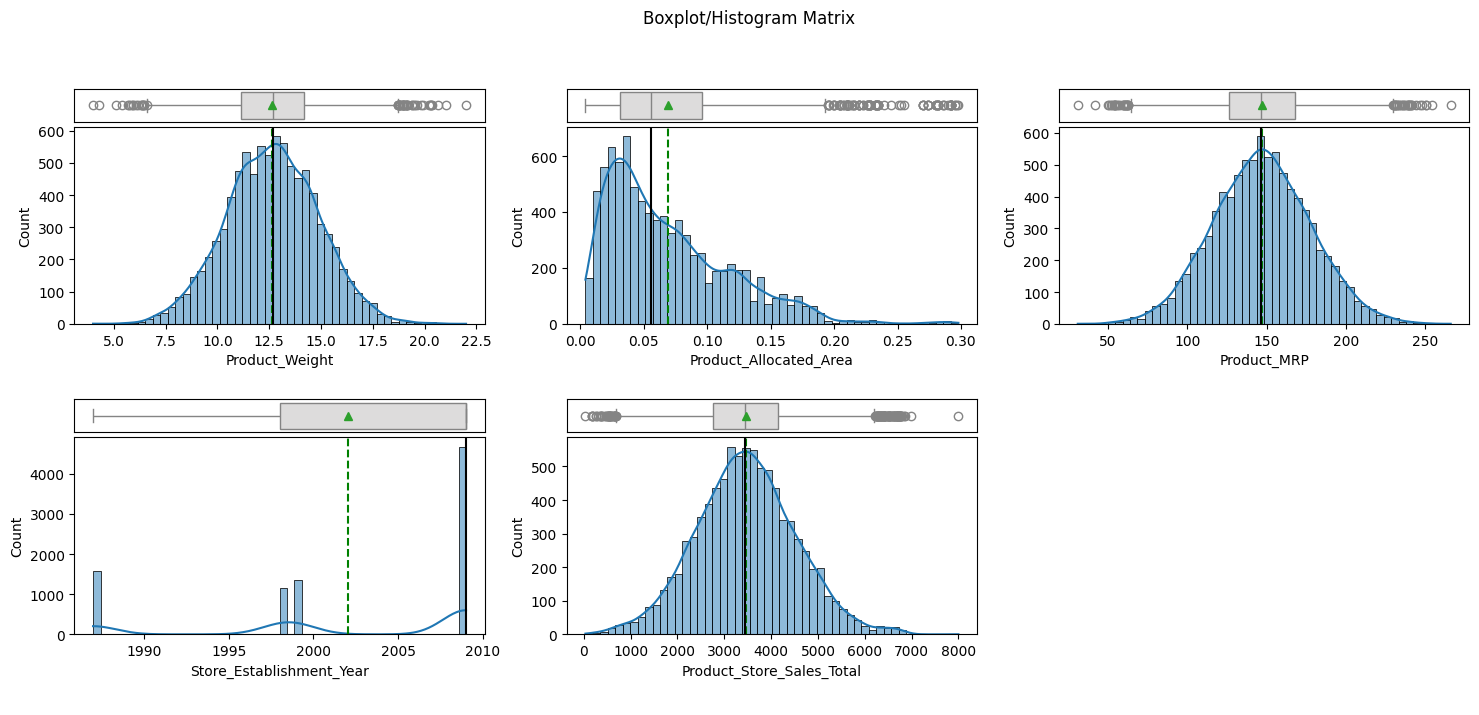

In [22]:
utils.histogram_boxplot_grid(num_col, data, 3)

**Observations:**
- ***product_weight:*** The product weight is normally distributed with mean and median lying around 12.5.
- ***product_allocated_area:*** The distribution is right skewed with the median lying around 0.05.
- ***product_mrp:*** The product MRP is normally distributed with mean and median lying around 150.
- ***product_store_sales_total:*** The revenue generated from each product at a particular store is normally distributed with mean and median lying around 3500.


**Count plots of the categorical vaariables**

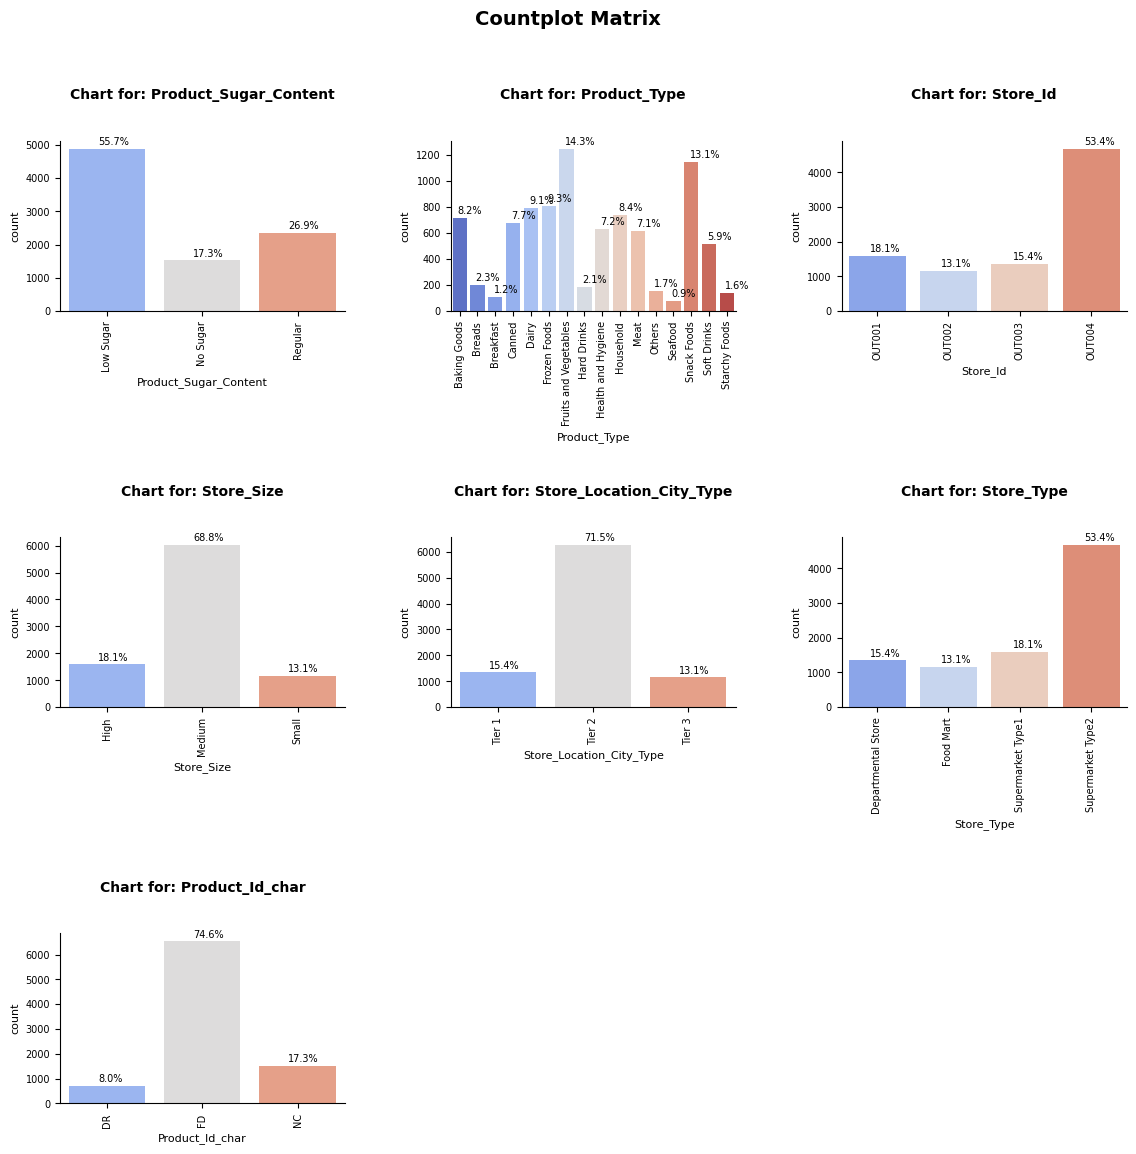

In [23]:
cat_col = data.select_dtypes(include=['object']).columns.tolist()

# Saving column names with 'int', float datatype to a list - used later in EDA
num_col = data.select_dtypes(include=['int64','float64']).columns.tolist()

utils.countplot_grid(data, cat_col)

**Observations:**
- ***product_sugar_content:*** 
  - Around 56% of the products are having low sugar followed by 27% products which are having regular sugar content, and 17% of the products are having no sugar content.
- ***product_type:*** 
  - Fruits and vegetables (14%) and Snack Foods (13%) have been bought the highest number of times from all the stores combined.
  - Seafood (1%) has been bought the lowest number of times.
  - The highest product type which is Fruits and Vegetables is 14 times the lowest product type which is sea food.
- ***store_id:*** 
  - Around 53% of the products are being sold from outlet OUT004. An almost equal number of products have been sold from the other three stores each.
  - When compared to the four Store_Ids the products, which are being sold from outlet OUT002 are low.   
- ***store_size:***  
  - Around 69% of the products have been sold from the stores which are medium in size
  - The products that have been sold from the stores which are high and small are almost the same in size.
- ***store_location_sity_type:***
  - Around 72% of the products have been sold from stores which are located in Tier 2 cities.
  - The products that have been sold from the stores are located in Tier 1 and Tier 3 cities are almost the same.
- ***store_type:***
  - Around 53% of the products have been sold from stores that are of Supermarket Type2.
  - The products that have been sold from stores which are of Supermarket Type1, Food Mart and Departmental Store are almost same.

### **Bivariate Analysis**

**Distribution Statistical Testing**

1. We will look at **distributions and perform hypothesis tests** (Anova, Kruswal-Wallace, etc..), to determine if there are differences in the categories for each numerical value. We will also plot the **boxplots for where the distributions are statistically different**.

  - For the hypothesis testing we will use the following setup:
    - H<sub>o</sub> = the distributions are the same
    - H<sub>a</sub> = the distrubtions are not the same
    - $\alpha$ = .05 


  - If the p-value of the test is less than $\alpha$ then we can reject the H<sub>o</sub> and declare the distrubutions are different.

In [24]:
newdf = utils.distribution_check(data, num_col, cat_col)

# create a dataframe for the distributions that are different
boxplotdf = newdf[newdf['is_different'] == True].reset_index(drop=True)

#print the result of the data frame
boxplotdf

,num_column,cat_column,num_categories,stat_test,stat_val,p_val,is_different
0,Product_Weight,Product_Type,16,Anova,1.887544,0.019832,True
1,Product_Weight,Store_Id,4,Kruskal-Wallis,3474.945989,0.000000,True
2,Product_Weight,Store_Size,3,Kruskal-Wallis,1929.700227,0.000000,True
3,Product_Weight,Store_Location_City_Type,3,Kruskal-Wallis,3089.545817,0.000000,True
4,Product_Weight,Store_Type,4,Kruskal-Wallis,3474.945989,0.000000,True
5,Product_MRP,Store_Id,4,Kruskal-Wallis,3837.748565,0.000000,True
6,Product_MRP,Store_Size,3,Kruskal-Wallis,2173.926759,0.000000,True
7,Product_MRP,Store_Location_City_Type,3,Kruskal-Wallis,3324.825334,0.000000,True
8,Product_MRP,Store_Type,4,Kruskal-Wallis,3837.748565,0.000000,True
9,Store_Establishment_Year,Product_Type,16,Kruskal-Wallis,25.078810,0.048895,True


**Boxplots of the combinations where differences are observed**

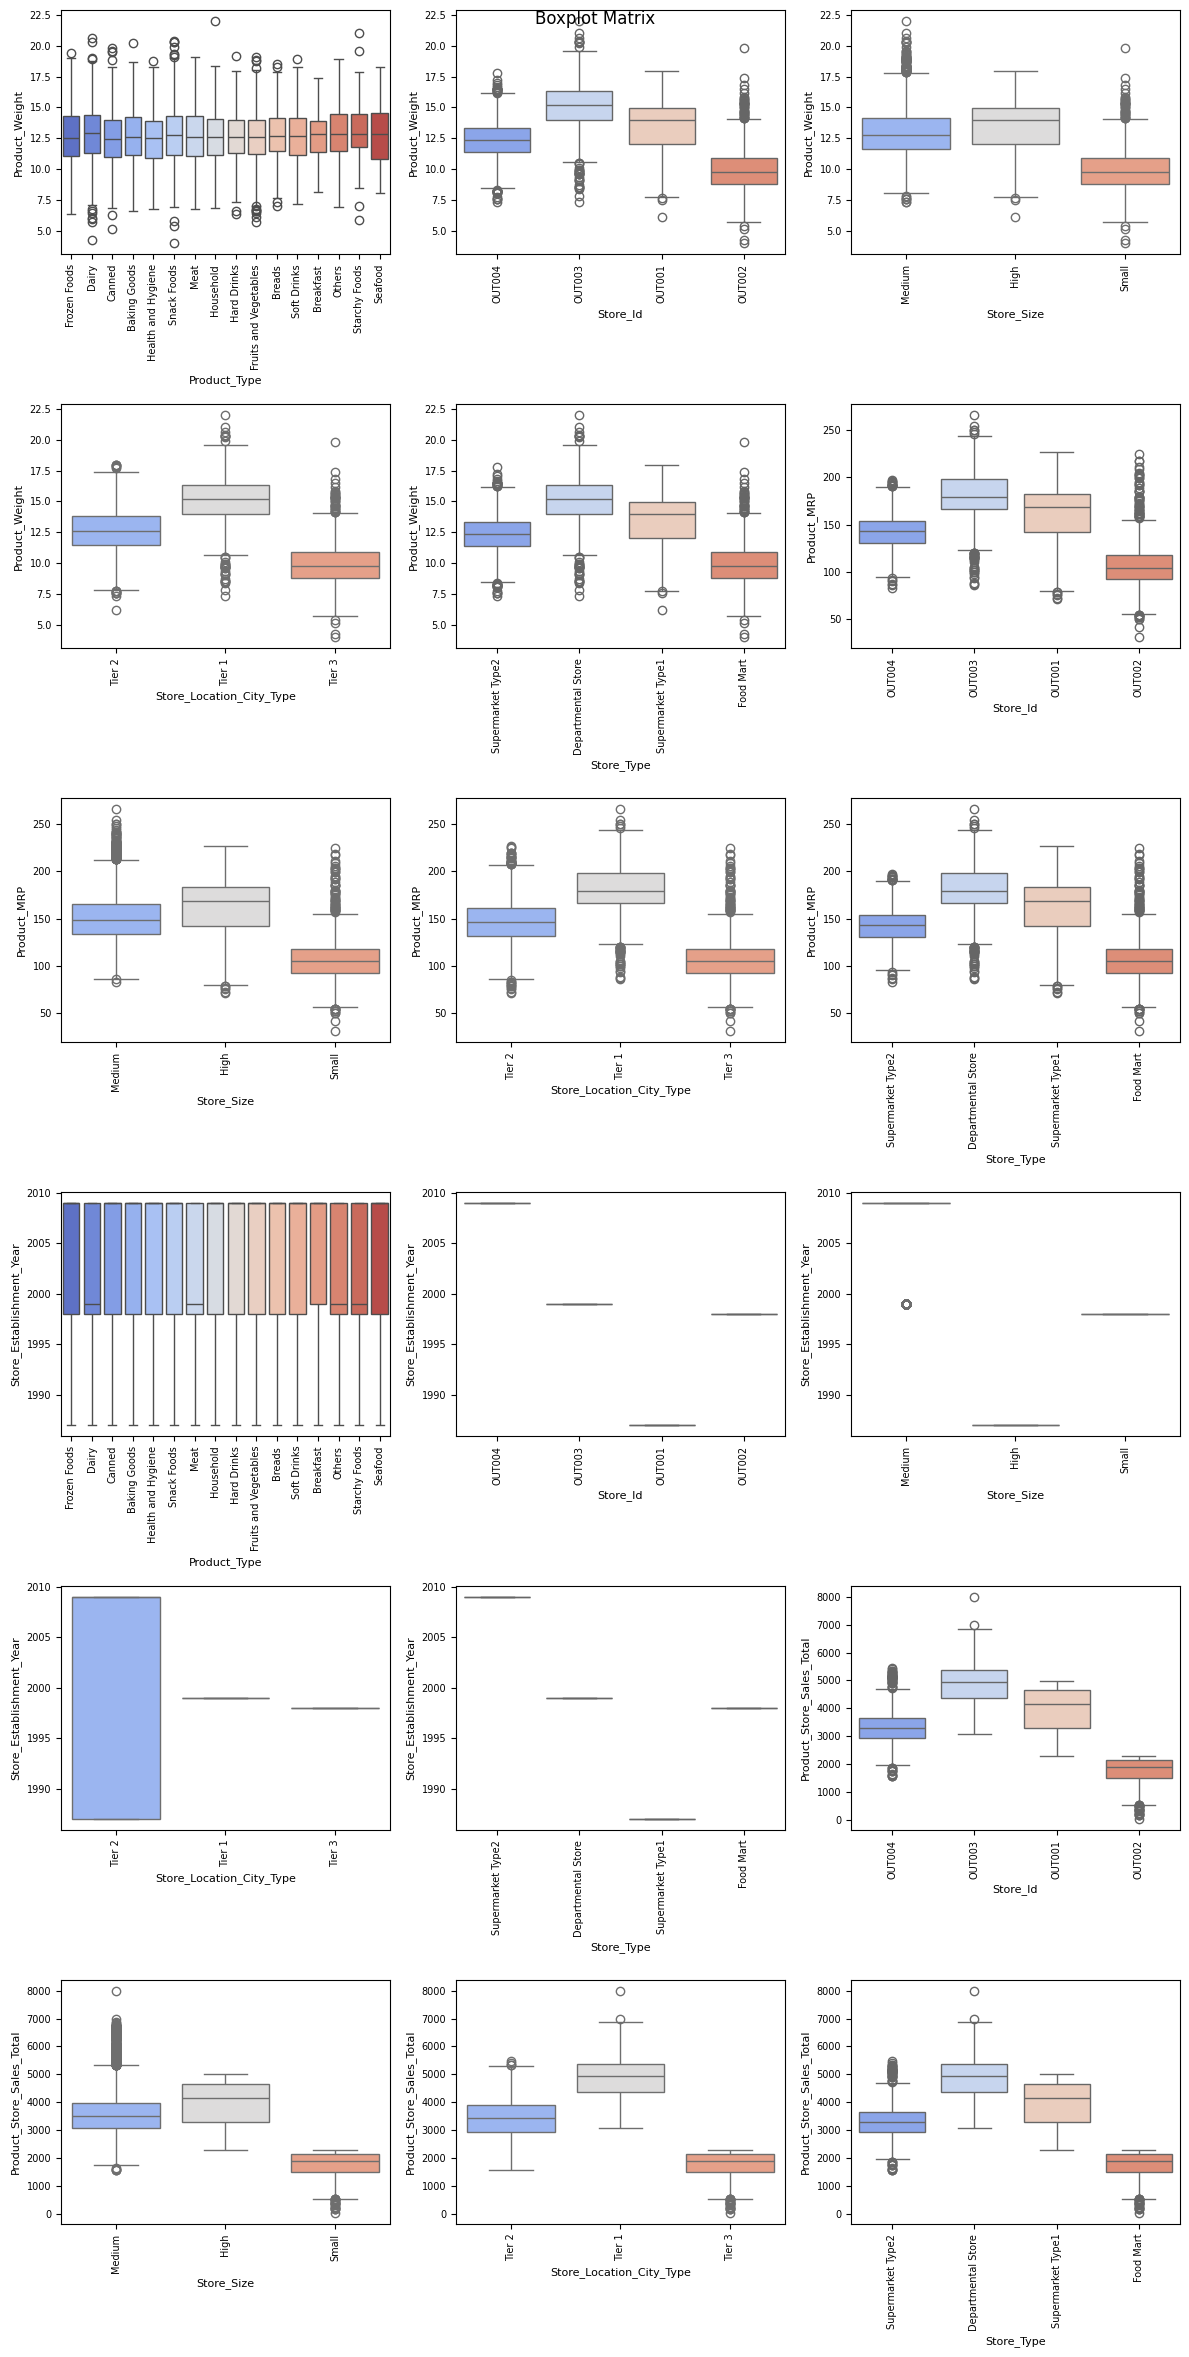

In [25]:
# columns to keep in teh dataframe to be passed to the boxplot grid
columns_to_keep = ['num_column', 'cat_column']

# Create a new DataFrame with only the specified columns
plotdf = boxplotdf[columns_to_keep].reset_index(drop=True)

#Create the boxplot grid (dataframe to indicate whoch columns to plot, the data in which to be plotted)
utils.boxplot_grid(plotdf, data)

**Observations**
- ***product_weight, product_mrp, store_establishment_year, product_store_sales_total:***
  - All have category diffrences with the categorical variables ***store_id, store_size, store_id, store_location_city_type***

**Correaltion Study**

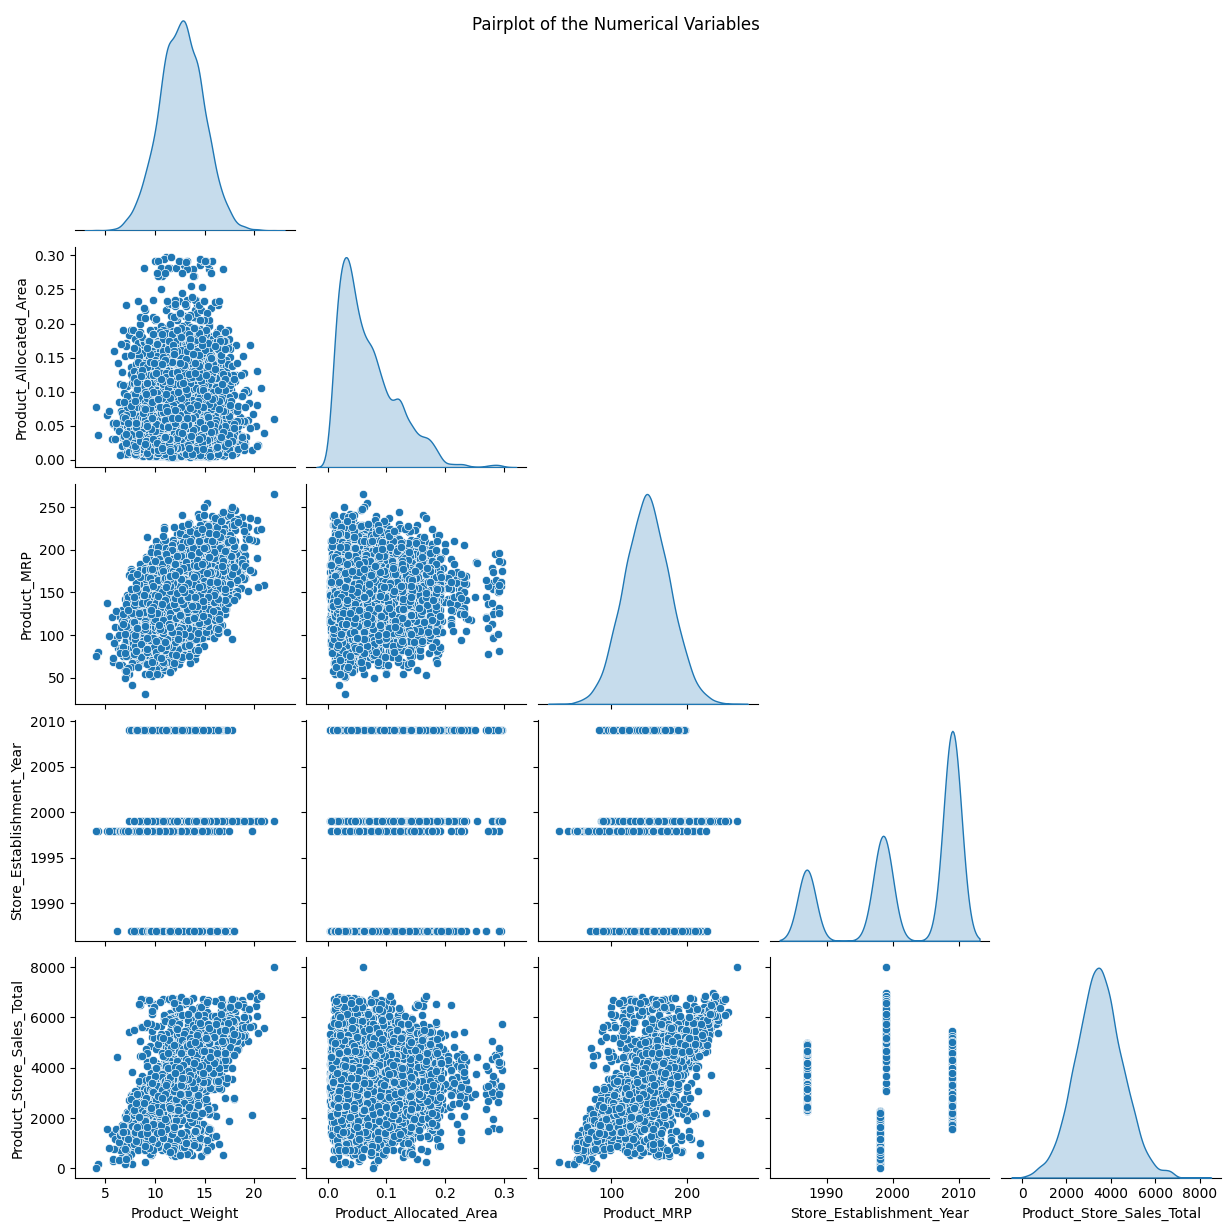

In [26]:
# use a pair plot to look at the distrubution and the correlation between the numeric variables
utils.pplot(data, num_col) 

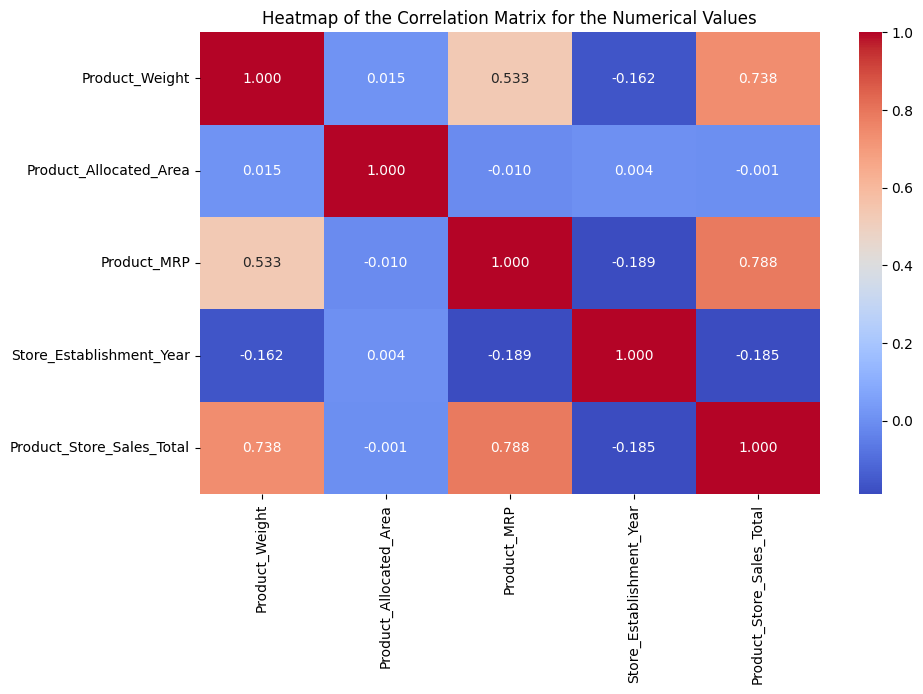

In [27]:
#create a correlation matrix and plot it
utils.corr_matrix(data[num_col])

**Observations:**
- ***product_weight*** and ***product_mrp*** are highly correlated with our target variable i.e ***product_store_sales_total***.
- ***product_weight*** and ***product_mrp*** are moderately correlated with each other.
- ***store_establishment_year*** is highly negatively correlated with our target variable i.e ***product_store_sales_total***.
- There is not much correlation among the rest of the variables.


Let us look at our target variable with all of the categprical variables

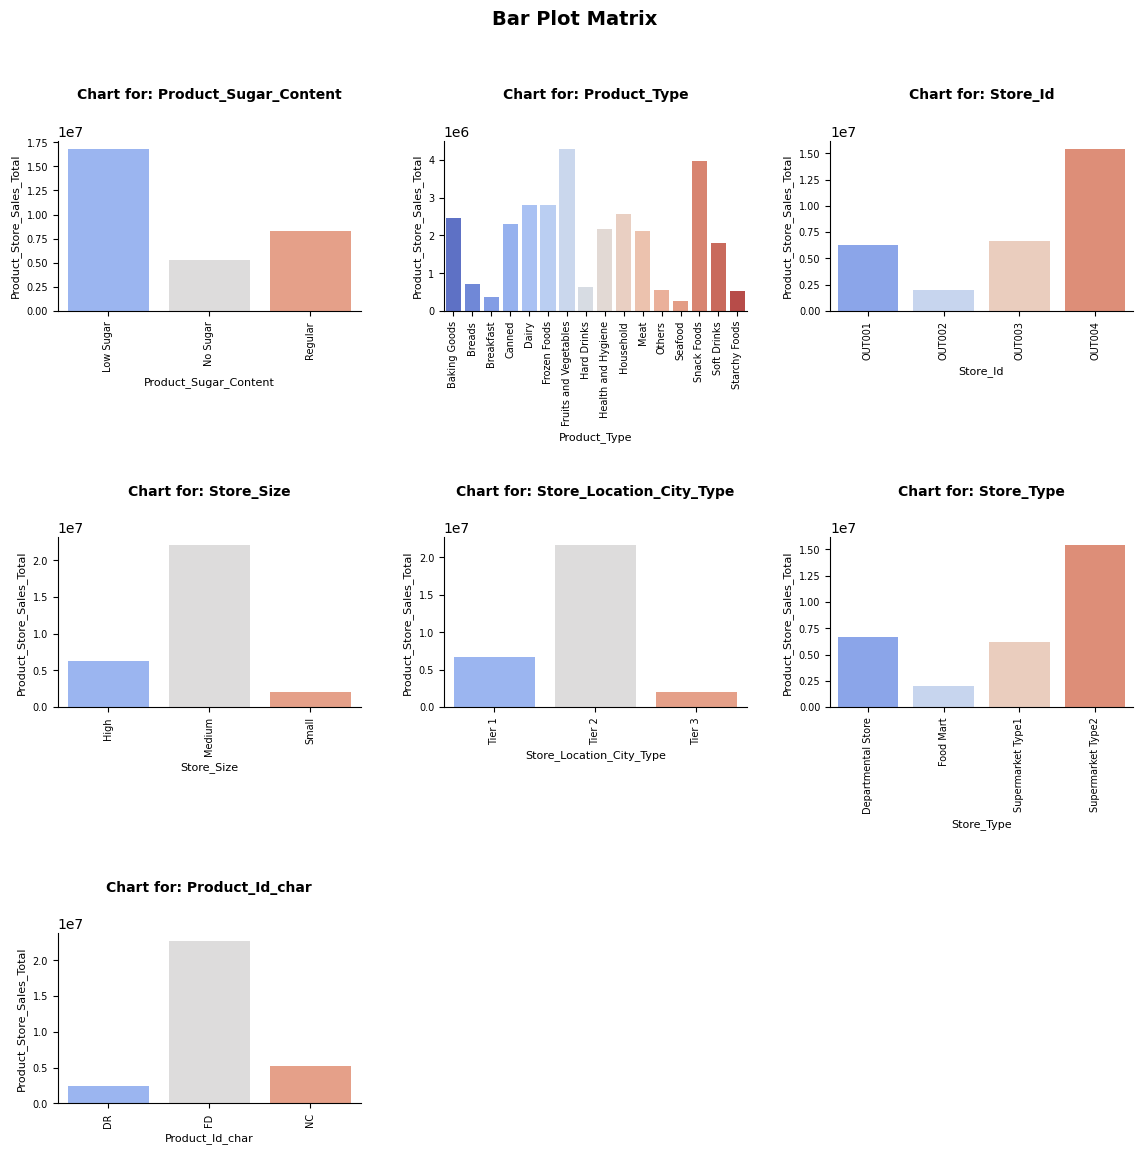

In [28]:
utils.barplot_grid(data, cat_col, var='Product_Store_Sales_Total')

**Observations**
  - ***product_sugar_content:***
    - Low sugar content materials are the biggest contributors to the revenue of the company(SuperKart).
    - No Sugar content materials are the lowest contributors to the revenue of the company(SuperKart).
  - ***product_type:***
    - Fruits and vegetables and snack foods are the biggest contributors to the revenue of the company(SuperKart).
    - Seafood is the lowest contributor to the revenue of the company(SuperKart).
    - Dairy and Frozen foods are contributing almost the same to the revenue of the company.
  - ***store_id:***
    - OUTOO4 is contributing the most to the revenue of the company which is more than double the contribution being made by second-placed store OUT003.
    - OUT002 is contributing the least to the revenue of the company which is two times less than OUT001 and OUT003.
  - ***store_size:***
    - The medium-sized stores are contributing heavily to the revenue.
    - The high-sized stores are contributing the least to the revenue.
  - ***store_location_city_type:***
    - Stores in the Tier 2 cities are contributing the most to the revenue of SuperKart.
    - Stores in the Tier 3 cities are contributing the least to the revenue of SuperKart.
  - ***store_type:***
    - Stores of Supermarket Type 2 are performing exceptionally well.
    - Stores of SuperKart Type 1 and Departmental Store are almost contributing the same revenue to the company.

## Feature Engineering and Data Preparation

### **Feature Engineering**

A store that has been in the business for a long duration is more trustworthy than the newly established one. On the other hand, older stores may sometimes lack infrastructure if proper attention is not given. So let us calculate the current age of the store and incorporate that into our model.


In [29]:
# Outlet Age
data["Store_Age_Years"] = 2022 - data.Store_Establishment_Year

We have 16 different product types in our dataset. So let us make two broad categories, perishables and non perishables, in order to reduce the number of product types.


In [30]:
# Make the list of product types
perishables = ["Dairy","Meat","Fruits and Vegetables","Breakfast","Breads","Seafood",]

# function to make the change
def change(x):
    if x in perishables:
        return "Perishables"
    else:
        return "Non Perishables"

#apply the change
data.Product_Type.apply(change)

# function to create a new column and append the new type
change1 = []
for i in range(0, len(data)):
    if data.Product_Type[i] in perishables:
        change1.append("Perishables")
    else:
        change1.append("Non Perishables")

# apply the new category type
data["Product_Type_Category"] = pd.Series(change1)

In [31]:
#verify the change
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years,Product_Type_Category
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD,13,Non Perishables
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD,23,Perishables
2,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD,35,Non Perishables
3,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD,35,Non Perishables
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC,24,Non Perishables


### **Outlier Check**

**Observations:**

- Based on the boxplots in the earlier univariate analysis
  - There are quite a few outliers in the data.
  - However, we will not treat them as they are proper values.

### **Data Preparation for modeling**

- We want to forecast the Product_Store_Sales_Total. 
- Before we proceed to build a model, we'll have to encode categorical features and drop the unnecessary columns
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [32]:
# Drop the variables that have either been included in our feature engineering or not needed
data = data.drop(["Product_Type", "Store_Id", "Store_Establishment_Year"], axis = 1)

In [33]:
# encode the categorical data
data = pd.get_dummies(
    data,
    columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

In [34]:
# Separating features and the target column
x = data.drop(["Product_Store_Sales_Total"], axis = 1)
y = data["Product_Store_Sales_Total"]

In [35]:
# adding a constant
x = sm.add_constant(x)

In [36]:
# Splitting the data into train and test sets in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.30, random_state = 1)

#### **Check for Multicollinearity**



We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped/treated till all the features have a VIF score < 5

In [37]:
print(utils.checking_vif(x_train))


                              feature       VIF
0                               const  0.000000
1                      Product_Weight  1.752928
2              Product_Allocated_Area  1.001184
3                         Product_MRP  1.885058
4                     Store_Age_Years       inf
5      Product_Sugar_Content_No Sugar       inf
6       Product_Sugar_Content_Regular  1.088506
7                   Store_Size_Medium       inf
8                    Store_Size_Small       inf
9     Store_Location_City_Type_Tier 2       inf
10    Store_Location_City_Type_Tier 3       inf
11               Store_Type_Food Mart       inf
12       Store_Type_Supermarket Type1       inf
13       Store_Type_Supermarket Type2       inf
14                 Product_Id_char_FD  2.774371
15                 Product_Id_char_NC       inf
16  Product_Type_Category_Perishables  1.217690


**Observations:**
- The VIF of Product_Weight, Product_Allocation_Area, Product_MRP, Product_Id_char_FD are less.
- The VIF for dummy variables can be ignored which is expected that they would have a high VIF.
- But the continuous variables should not have high VIF.

In [38]:
# drop the columns with vif > 5
x_train = x_train.drop('Store_Age_Years',axis = 1)
x_test = x_test.drop('Store_Age_Years',axis = 1)

In [39]:
# print the vif to verify
print(utils.checking_vif(x_train))

                              feature       VIF
0                               const  0.000000
1                      Product_Weight  1.752928
2              Product_Allocated_Area  1.001184
3                         Product_MRP  1.885058
4      Product_Sugar_Content_No Sugar       inf
5       Product_Sugar_Content_Regular  1.088506
6                   Store_Size_Medium       inf
7                    Store_Size_Small       inf
8     Store_Location_City_Type_Tier 2       inf
9     Store_Location_City_Type_Tier 3       inf
10               Store_Type_Food Mart       inf
11       Store_Type_Supermarket Type1       inf
12       Store_Type_Supermarket Type2       inf
13                 Product_Id_char_FD  2.774371
14                 Product_Id_char_NC       inf
15  Product_Type_Category_Perishables  1.217690


## Model Training and Building

Let's create a function to calculate the performance metrics for our regression model so that we don't need to use the same code repeatedly. 

In [40]:
# Create the model
model1 = sm.OLS(y_train, x_train.astype(float)).fit()

# Get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.824
Model:                                   OLS   Adj. R-squared:                  0.823
Method:                        Least Squares   F-statistic:                     2860.
Date:                       Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                               06:12:25   Log-Likelihood:                -46132.
No. Observations:                       6134   AIC:                         9.229e+04
Df Residuals:                           6123   BIC:                         9.236e+04
Df Model:                                 10                                         
Covariance Type:                   nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               176.6077     42.659      4.140      0.000      92.982     260.234
Product_Weight                      135.0943      3.436     39.318      0.000     128.359     141.830
Product_Allocated_Area             -139.5679    118.876     -1.174      0.240    -372.608      93.472
Product_MRP                          12.8696      0.254     50.702      0.000      12.372      13.367
Product_Sugar_Content_No Sugar       16.0039     12.324      1.299      0.194      -8.155      40.163
Product_Sugar_Content_Regular        30.8608     13.284      2.323      0.020       4.819      56.902
Store_Size_Medium                   394.3947     26.547     14.856      0.000     342.353     446.436
Store_Size_Small                   -383.1731      5.776    -66.339      0.000    -394.496    -371.850
Store_Location_City_Type_Tier 2    -308.1516      8.855    -34.801      0.000    -325.510    -290.794
Store_Location_City_Type_Tier 3    -383.1731      5.776    -66.339      0.000    -394.496    -371.850
Store_Type_Food Mart               -383.1731      5.776    -66.339      0.000    -394.496    -371.850
Store_Type_Supermarket Type1        165.3861     17.762      9.311      0.000     130.566     200.206
Store_Type_Supermarket Type2       -473.5378     17.176    -27.570      0.000    -507.208    -439.867
Product_Id_char_FD                    0.3932     21.936      0.018      0.986     -42.609      43.396
Product_Id_char_NC                   16.0039     12.324      1.299      0.194      -8.155      40.163
Product_Type_Category_Perishables     7.7111     13.233      0.583      0.560     -18.231      33.653
==============================================================================
Omnibus:                     1745.262   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46497.082
Skew:                           0.775   Prob(JB):                         0.00
Kurtosis:                      16.399   Cond. No.                     2.46e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.31e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [41]:
# Checking model1 performance
utils.metrics_reg(model1, x_train, x_test, y_train, y_test)

    Data        RMSE         MAE        r2
0  Train  446.667654  262.110666  0.785927
1   Test  446.685287  266.690587  0.790208


**Observations:**
- The Train and the Test scores are very close to each other so we can say the model is not overfitting. 
- However, the Test score is slightly better than the Train score. So, we might be able to get better performance if we increase the complexity of the model.

###  **Drop insignificant variables (variables with p-value > 0.05) from the above model and create the regression model again.**

In [42]:
x_train1 = x_train.drop(["Product_Type_Category_Perishables", "Product_Id_char_FD"], axis = 1)

In [43]:
x_test1 = x_test.drop(["Product_Type_Category_Perishables", "Product_Id_char_FD"], axis = 1)

In [59]:
# Create the model
model2 = sm.OLS(y_train, x_train1.astype(float)).fit()
predictions = model2.predict(x_train1)

# Get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.824
Model:                                   OLS   Adj. R-squared:                  0.823
Method:                        Least Squares   F-statistic:                     3576.
Date:                       Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                               06:27:59   Log-Likelihood:                -46132.
No. Observations:                       6134   AIC:                         9.228e+04
Df Residuals:                           6125   BIC:                         9.234e+04
Df Model:                                  8                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             179.0666     40.949      4.373      0.000      98.793     259.340
Product_Weight                    135.0918      3.435     39.323      0.000     128.357     141.827
Product_Allocated_Area           -140.3752    118.852     -1.181      0.238    -373.367      92.616
Product_MRP                        12.8703      0.254     50.727      0.000      12.373      13.368
Product_Sugar_Content_No Sugar     14.1944      7.933      1.789      0.074      -1.358      29.747
Product_Sugar_Content_Regular      30.7219     13.272      2.315      0.021       4.704      56.740
Store_Size_Medium                 395.6741     25.835     15.316      0.000     345.029     446.319
Store_Size_Small                 -382.7595      5.395    -70.953      0.000    -393.335    -372.184
Store_Location_City_Type_Tier 2  -307.8490      8.636    -35.648      0.000    -324.778    -290.920
Store_Location_City_Type_Tier 3  -382.7595      5.395    -70.953      0.000    -393.335    -372.184
Store_Type_Food Mart             -382.7595      5.395    -70.953      0.000    -393.335    -372.184
Store_Type_Supermarket Type1      166.1521     17.353      9.575      0.000     132.135     200.169
Store_Type_Supermarket Type2     -474.0011     17.074    -27.762      0.000    -507.472    -440.530
Product_Id_char_NC                 14.1944      7.933      1.789      0.074      -1.358      29.747
==============================================================================
Omnibus:                     1744.629   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46526.548
Skew:                           0.775   Prob(JB):                         0.00
Kurtosis:                      16.403   Cond. No.                     1.78e+34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.4e-61. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
# Checking model2 performance
#model_pref(model2, X_train1, X_test1)
utils.metrics_reg(model2, x_train1, x_test1, y_train, y_test)

    Data        RMSE         MAE        r2
0  Train  446.681336  262.125308  0.785911
1   Test  446.780252  266.790089  0.790113


**Observations:**
- The train and the test scores are very close to each other. So, we can say the model is not overfitting. 
- However, the test score is slightly better than the training score. So, we might be able to get better performance if we increase the complexity of the model.
- So, model2 is performing the best when compared with model1 because in model2 we are dropping insignificant variables.

### **Checking the linear regression assumptions**

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

### **1. Check for mean residuals**

In [46]:
residuals = model2.resid

np.mean(residuals)

9.800124194389218e-12

**Observation:**

- The mean of residuals is very close to 0. Hence, the corresponding assumption is satisfied.

### **2. Check for homoscedasticity**

- Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

- We'll use `Goldfeldquandt Test` to test the following hypothesis with $\alpha$ = 0.05:

    - H<sub>o</sub>: Residuals are homoscedastic
    - H<sub>a</sub>: Residuals have heteroscedastic

In [47]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [48]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train, x_train1.astype(float))
lzip(name, test)

[('F statistic', 0.9832189770563935), ('p-value', 0.6800664494251423)]

**Observation:**

- Since p-value > 0.05, we cannot reject the Null Hypothesis that the residuals are homoscedastic and the corresponding assumption is satisfied.

### **3. Linearity of variables**

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

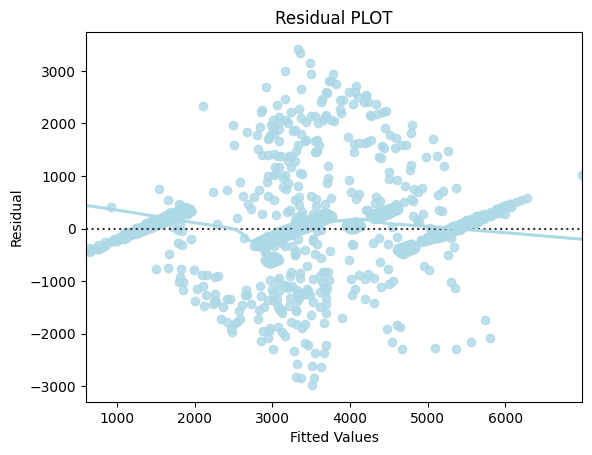

In [49]:
# Predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

**Observation:**

- There is no pattern in the residual vs fitted values plot. Hence, the corresponding assumption is satisfied.

### **4. Normality of error terms**

The residuals should be normally distributed.

<Axes: ylabel='Count'>

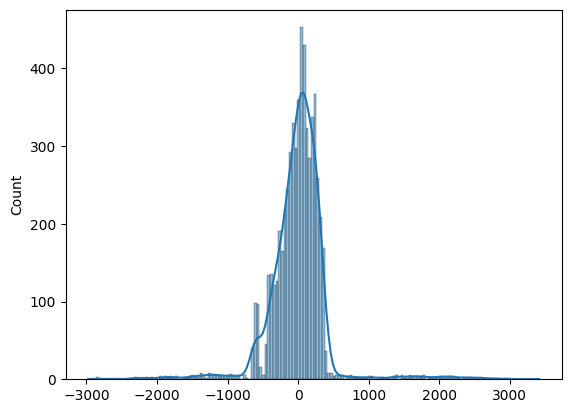

In [50]:
# Plot histogram of residuals
sns.histplot(residuals, kde = True)

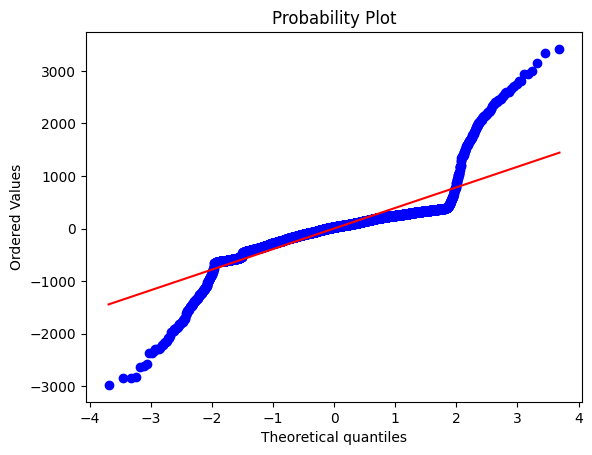

In [51]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

**Observation:**

- From the above plots, the residuals seem to follow a normal distribution. Hence, the corresponding assumption is satisfied. Now, we will check the model performance on the train and test datasets.

## Model Validation

 **Apply cross validation to improve the model and evaluate it using different evaluation metrics**

Let's check the performance of the model using the cross-validation technique from the scikit-learn library and see if the performance on the train and the test data is comparable to what we are getting after cross-validating the data. 

In [52]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, x_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, x_train, y_train, cv = 10, scoring = 'neg_mean_squared_error')                                  

print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.823 (+/- 0.045)
Mean Squared Error: 200712.689 (+/- 64085.512)


**Observation:**
- After applying cross-validation the model score has improved. We can compare it by the evaluation metric scores.

## Model Selection, Actionable Insights and Business Recommendations

- We can use this prediction model to predict the total sales that will be done by SuperKart in the next quarter.

- The model explains around 82% of the variation in the data.

- **OUT004** - OUT004, which is of Supermarket Type2, located in a Tier 2 city and having store size as medium, is performing well. SuperKart can look to increase the size of this store from medium to high. They can also look to set up stores in this type of city having comparable socio-economic conditions in order to expand their business and reach.

- **OUT002** - OUT002, being a food mart in a Tier 3 city and having small store size, is also performing well. SuperKart can look to upgrade its size or target similar cities for business expansion.

- **OUT001** - OUT001 which is a store of Supermarket Type 1, located in a Tier 2 city and having store size as high is not performing upto the mark. SuperKart can look to look build new marketing strategies (maybe give attractive discounts and offers) in this store in order to attract more customers.

- **OUT003** - Similar approach can be taken to increase the business of OUT003 which is a Departmental store in a Tier 1 city and having store size as medium. It is the premium store of the company where most of the costly goods are sold, so the correct set of audience should be targetted.

- Daily needs like fruits and vegetables and snack foods are the biggest contributors to the revenue across all the stores. So SuperKart should look to maintain the inventory of these products properly and ensure that these products never face a shortage.

**Additional information that can be collected to gain better insights -**

- Customers' details like age and gender can be incorporated in this model so that the company gets to know their target audience well and can build their sales strategies according to that.

- The company should also keep a watch for the number of festive occasions present in a quarter so that they can strategize their inventory accordingly.